# DATA PREPARATION
**History:**
- Inspected data:
    - Mulitple NaN
    - Large spikes in measurement (power out, outliers, etc)
    - Time formatting
    - Number formatting
    - Collect together 
    - Visualization



In [21]:
#Data_set 1
cell_range='A:N'    
df01 = pd.read_excel('Ball mill APC 2_1.xlsx',usecols=cell_range,skiprows=8, header=0)
#df01.head()
df01.iloc[190:196]

Time    tons /hr Feed_water Mill_speed    Cyc_flow   
190 2022-12-06 06:20:00    1.657558  15.892981  15.151082  516.647949  \
191 2022-12-06 06:22:00    1.250232  15.647909  15.145509  534.943665   
192 2022-12-06 06:24:00    1.774005  15.402837  15.139935  533.618774   
193 2022-12-06 06:26:00   Bad Input  Bad Input  Bad Input   Bad Input   
194 2022-12-06 06:28:00  116.620483  15.373811  15.138649  523.807373   
195 2022-12-06 06:30:00  105.588028  15.509114  15.143703  521.066345   

    Sump_water     Mill_BP1     Mill_BP2     Mill_BP3     Mill_BP4 Mill_power   
190   58.53056  6130.010254  6045.621094  5907.087891  5215.354492       2189  \
191  80.873077  6129.363281  6025.730469  5888.311523   5207.12207       2196   
192   85.40081  6102.563477  6006.672852  5897.744141  5120.723633       2199   
193  Bad Input    Bad Input    Bad Input    Bad Input    Bad Input  Bad Input   
194  70.974548   6056.24707   5961.37207   5836.28418  5072.224121       2201   
195  60.964672  6096.568359  5993.056641  5787.796387  5161.925781       2202   

    Sump_level Cyc_density Cyc_pressure  
190  25.861053   53.978691    11.420454  
191  31.387827   52.204437    11.421871  
192  39.715485   51.285824    11.423288  
193  Bad Input   Bad Input    Bad Input  
194  45.407715   50.692745    11.444195  
195  42.821278   51.040535    11.448527

In [63]:
#FOR DATA SET 2:
cell_range='A:N'      #'A9:N43930' with header
df2 = pd.read_excel('Ball mill APC 2_2.xlsx',usecols=cell_range,skiprows=7, header=0)
df2 = df2.drop(df02.index[0:720]) #remove overlap
df2=df2.drop(df2.index[0])
df2.head()

In [79]:
#APPEND TOGETHER FOR VISUAL, CLEANING
df=pd.concat([df1,df2])

# df.to_csv('datasetcomplete.csv',index=False)
# df.to_excel('full data set.xlsx',index=False)
len(df)
#87091

87091

In [87]:
#df.dropna() #nothing happens

string_to_find = input('Type String desired to remove:')

# Select the rows that contain the string input
for f,i in enumerate(df.columns):
    if f==0:
        pass
    else:
        df[i] = df[i].astype(str)
        mask = df[i].str.contains(string_to_find, case=False)
        selected_rows = df[mask]
        df = df.drop(selected_rows.index)
        df[i] = df[i].astype(float)
        print(len(df))

# Drop the selected rows from the DataFrame


Bad Input Bad Input


87086
87086
87085
87085
87085
87085
87085
87085
87085
87085
87085
87085
87085


In [92]:
df['Time'] = pd.to_datetime(df['Time'])

df = df.set_index('Time')



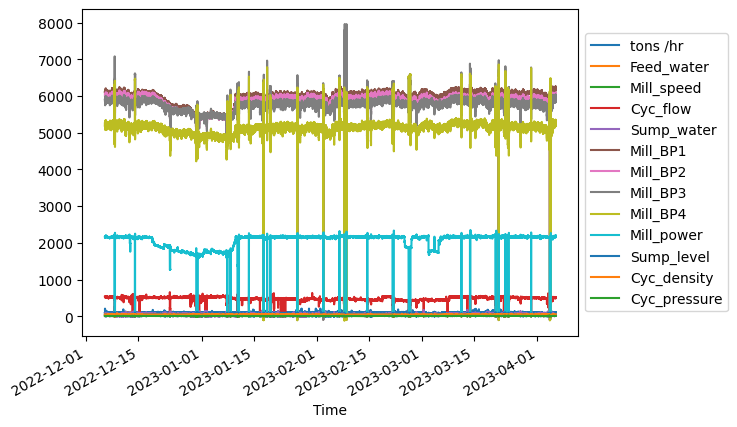

In [100]:
df.plot()
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#### save the data #####



#df.to_excel('full_cleansed_data.xlsx',index=True)

In [11]:
##########    IF STRIP DATETIME:     ###########
from datetime import datetime    #to strip time and index as # instead
data=df1.copy()
dtobj = datetime.strptime(data['Time'].iloc[0],'%I:%M:%S.%f')
dtobj2 = datetime.strptime(data['Time'].iloc[-1],'%I:%M:%S.%f')
dataf = data.copy()
dataf['Time'] = data['Time'].apply(func=lambda x: datetime.strptime(x,'%I:%M:%S.%f'))
dataf['timetot'] = dataf['Time'].apply(lambda x:(x-dtobj).microseconds/10**6+(x-dtobj).seconds)
dataf['timetot'].sample(5)

TypeError: strptime() argument 1 must be str, not Timestamp

# Visualization
## Start here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

#dfnew = pd.read_excel('full data set.xlsx',header=0) #,index_col=0,dtype=float)

# d= {}
# for key in dfnew.columns:
#     d[key] = float
    
# d['Time']='datetime64[ns]'
# print(d)
#seeq exel advanced go thru data
#good interface
#go to mohammed grad student if wanted
#try frist: just filter: rate of change filter. or drop and fill. fill in all gaps. can use a small section


df1 = pd.read_excel('full_cleansed_data.xlsx',header=0,usecols='A:N')


In [2]:
#df1 = df1.set_index('Time')
df2=df1.copy()

df2.head(2)

minute    tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water  \
0     0.0  102.936172   17.707464   15.150931  534.184387   56.929588   
1     2.0  103.558838   16.584286   15.145869  521.392517   33.607075   

      Mill_BP1     Mill_BP2     Mill_BP3     Mill_BP4  Mill_power  Sump_level  \
0  6100.553711  6034.728516  5911.115234  5186.361816        2156   46.984039   
1  6136.253418  6022.999023  5930.505371  5255.145996        2155   42.007778   

   Cyc_density  Cyc_pressure  
0    54.155647     11.247608  
1    54.143642     11.246670

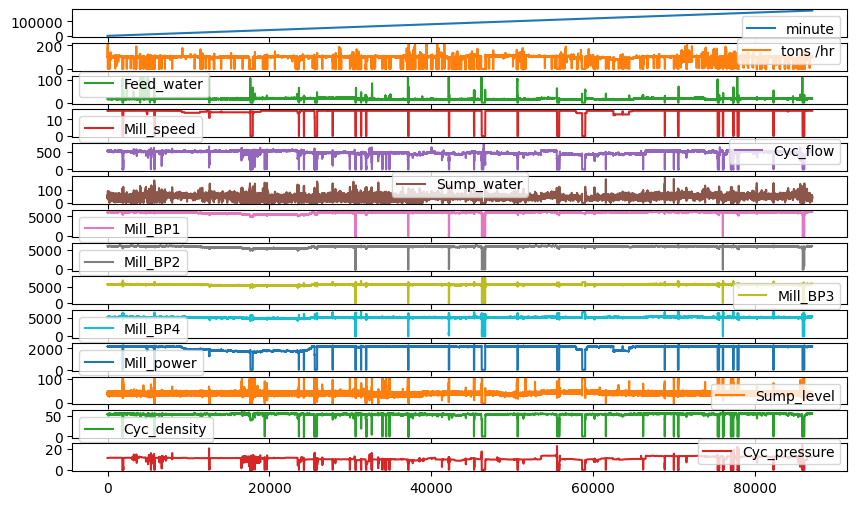

In [3]:
data=df1.copy()
data.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()

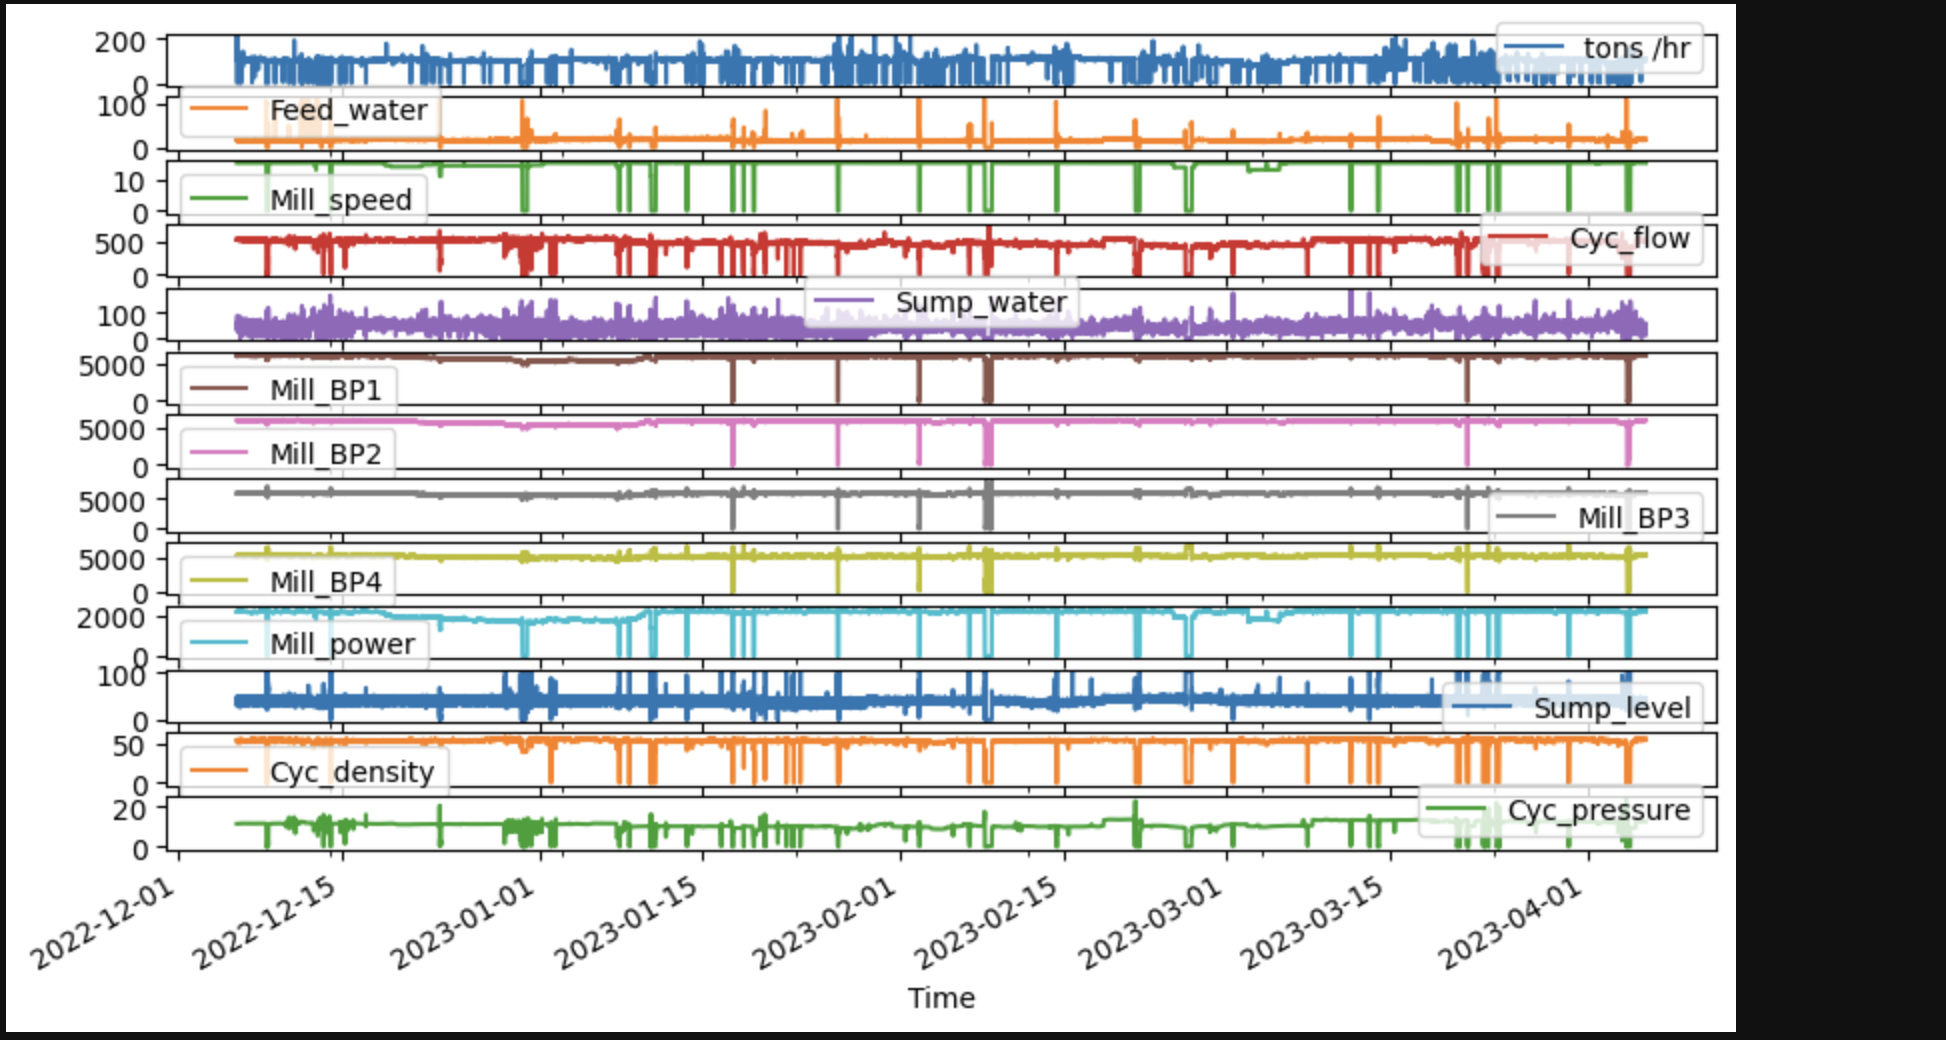

In [134]:
data.plot(kind='kde',subplots=True,layout=(5,3),figsize=(10,6))

## Observations:
- Nans removed
- All items take coordinated spike in measurements that will make scaling difficult (see density plots)
- Spikes are not reflected on all variables
    -tonnage especially frequently drops to 0 or below 0
- sump water noisy
- Taking the logarithm of data or Winsoring (setting 99 and 1st percentiles as max and min) could manage well
- Average of Mill Bearing Pressures should be adequate reflection of mill load as the 4 readings are consistent

## Conclusions:
- Scaling will be conducted in multiple ways
- K-means will be attempted on each data set and unscaled, then compared

### Notes:
- Date time will be converted to integer index (minutes)
- one hour is missing from the 5 months
- A few time points were removed as bad data (<10)

In [95]:
#dfnew = pd.read_excel('full data set.xlsx', header=0, dtype=d)
#dfnew.head(2)

# Fill in Data:
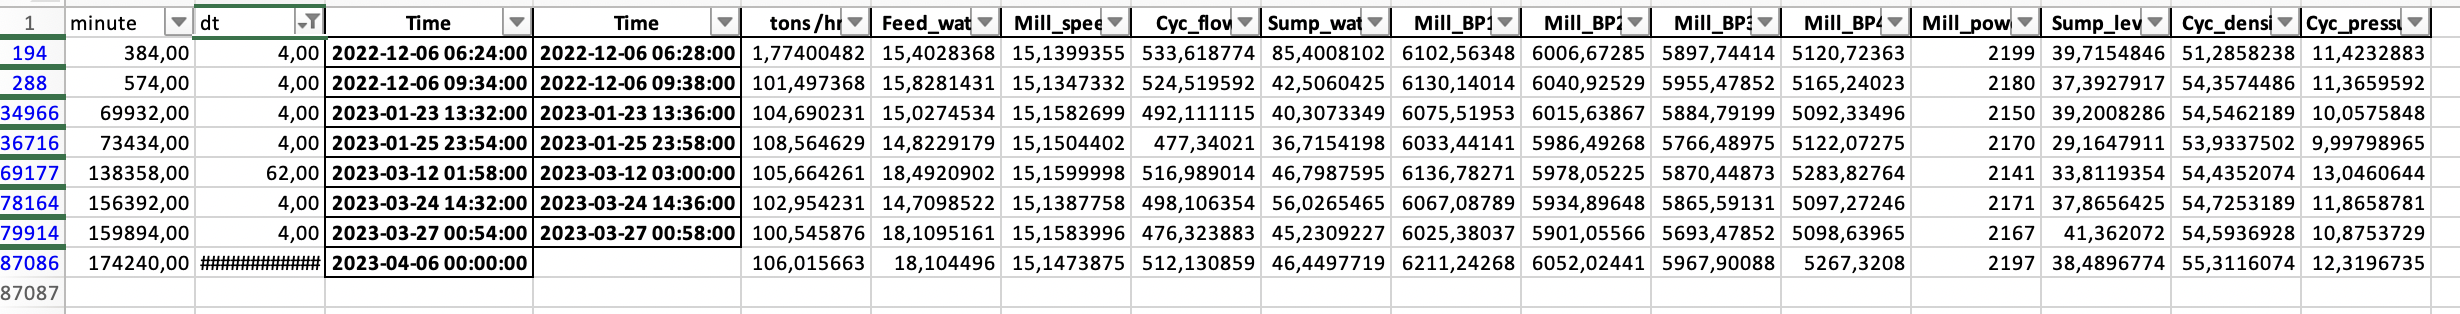

In [46]:
#view missing data points: to fill in
#df1.iloc[190:196]  #ramp up tonnage from 0    
# df1.iloc[284:290]  #random, SS
# df1.iloc[34962:34968] #ramp down to 0
# df1.iloc[36712:36718] #SS
# df1.iloc[69173:69179] #Appears SS, except Sump_water.... which varies significantly in all 
# df1.iloc[78162:78166] #SS
#df1.iloc[79910:79916] #SS

#average for all

minute    tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water   
190   380.0    1.657558   15.892981   15.151082  516.647949   58.530560  \
191   382.0    1.250232   15.647909   15.145509  534.943665   80.873077   
192   384.0    1.774005   15.402837   15.139935  533.618774   85.400810   
194   386.0   59.197244   15.388324   15.139292  528.713074   78.187679   
195   388.0  116.620483   15.373811   15.138649  523.807373   70.974548   
196   390.0  105.588028   15.509114   15.143703  521.066345   60.964672   

        Mill_BP1     Mill_BP2     Mill_BP3     Mill_BP4  Mill_power   
190  6130.010254  6045.621094  5907.087891  5215.354492      2189.0  \
191  6129.363281  6025.730469  5888.311523  5207.122070      2196.0   
192  6102.563477  6006.672852  5897.744141  5120.723633      2199.0   
194  6079.405273  5984.022461  5867.014160  5096.473877      2200.0   
195  6056.247070  5961.372070  5836.284180  5072.224121      2201.0   
196  6096.568359  5993.056641  5787.796387  5161.925781      2202.0   

     Sump_level  Cyc_density  Cyc_pressure  
190   25.861053    53.978691     11.420454  
191   31.387827    52.204437     11.421871  
192   39.715485    51.285824     11.423288  
194   42.561600    50.989285     11.433742  
195   45.407715    50.692745     11.444195  
196   42.821278    51.040535     11.448527

In [ ]:
# # select the rows above and below where the new row will be inserted
# for n in {194,288,34966,36716,78164,79914}:
#     n=n-2
#     row_above = df1.iloc[n]
#     row_below = df1.iloc[n+1]

#     # calculate the average of the above and below rows
#     row_avg = (row_above + row_below) / 2
#     navg=n+0.5
#     # insert the new row into the DataFrame
#     df1.loc[navg] = row_avg
#     df1 = df1.sort_index().reset_index(drop=True)

#     # display the updated DataFrame
#     print(df1.iloc[n-1:n+1]) #SS

In [55]:
len(df1)
df1.to_excel('filled_cleansed_data.xlsx',index=False)

In [56]:
df = pd.read_excel('filled_cleansed_data.xlsx',header=0)


minute    tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water   
0     0.0  102.936172   17.707464   15.150931  534.184387   56.929588  \
1     2.0  103.558838   16.584286   15.145869  521.392517   33.607075   
2     4.0  104.628387   16.629253   15.140807  521.360291   36.615730   
3     6.0  103.977753   16.137365   15.135746  523.875610   37.966499   
4     8.0  102.229675   15.267424   15.160000  527.401794   52.571075   

      Mill_BP1     Mill_BP2     Mill_BP3     Mill_BP4  Mill_power  Sump_level   
0  6100.553711  6034.728516  5911.115234  5186.361816      2156.0   46.984039  \
1  6136.253418  6022.999023  5930.505371  5255.145996      2155.0   42.007778   
2  6100.098145  6029.115723  5905.294922  5184.526855      2160.0   38.503761   
3  6114.615723  6016.797852  5844.339844  5269.082520      2167.0   32.937874   
4  6083.479004  6033.093262  5865.364746  5231.327148      2164.0   39.301735   

   Cyc_density  Cyc_pressure  
0    54.155647     11.247608  
1    54.143642     11.246670  
2    54.230686     11.245730  
3    54.317730     11.244792  
4    54.360500     11.243853

In [57]:
df.set_index('minute',inplace=True)
df.head()

tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water   
minute                                                               
0.0     102.936172   17.707464   15.150931  534.184387   56.929588  \
2.0     103.558838   16.584286   15.145869  521.392517   33.607075   
4.0     104.628387   16.629253   15.140807  521.360291   36.615730   
6.0     103.977753   16.137365   15.135746  523.875610   37.966499   
8.0     102.229675   15.267424   15.160000  527.401794   52.571075   

           Mill_BP1     Mill_BP2     Mill_BP3     Mill_BP4  Mill_power   
minute                                                                   
0.0     6100.553711  6034.728516  5911.115234  5186.361816      2156.0  \
2.0     6136.253418  6022.999023  5930.505371  5255.145996      2155.0   
4.0     6100.098145  6029.115723  5905.294922  5184.526855      2160.0   
6.0     6114.615723  6016.797852  5844.339844  5269.082520      2167.0   
8.0     6083.479004  6033.093262  5865.364746  5231.327148      2164.0   

        Sump_level  Cyc_density  Cyc_pressure  
minute                                         
0.0      46.984039    54.155647     11.247608  
2.0      42.007778    54.143642     11.246670  
4.0      38.503761    54.230686     11.245730  
6.0      32.937874    54.317730     11.244792  
8.0      39.301735    54.360500     11.243853

# Update:
-Filled Bad Data except for missing hour
-time is in minutes since start
-saved excel


In [58]:
df1=df.copy()
df['avg_BP']=df['Mill_BP1']+df['Mill_BP2']+df['Mill_BP3']+df['Mill_BP4']
df['avg_BP']=df['avg_BP']/4

In [64]:
df=df.drop(['Mill_BP1','Mill_BP2','Mill_BP3','Mill_BP4'],axis=1)
df.head()


tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water   
minute                                                               
0.0     102.936172   17.707464   15.150931  534.184387   56.929588  \
2.0     103.558838   16.584286   15.145869  521.392517   33.607075   
4.0     104.628387   16.629253   15.140807  521.360291   36.615730   
6.0     103.977753   16.137365   15.135746  523.875610   37.966499   
8.0     102.229675   15.267424   15.160000  527.401794   52.571075   

        Mill_power  Sump_level  Cyc_density  Cyc_pressure       avg_BP  
minute                                                                  
0.0         2156.0   46.984039    54.155647     11.247608  5808.189819  
2.0         2155.0   42.007778    54.143642     11.246670  5836.225952  
4.0         2160.0   38.503761    54.230686     11.245730  5804.758911  
6.0         2167.0   32.937874    54.317730     11.244792  5811.208984  
8.0         2164.0   39.301735    54.360500     11.243853  5803.316040

In [101]:
df.to_excel('fill_clean_avg_data.xlsx',index=True)

In [30]:
#if redoing: MV's left, CV's right

# dfn=pd.read_excel('fill_clean_avg_data.xlsx',header=0)
# df=dfn.set_index('minute')
# df = df.rename(columns={'Cyc_flow': 'Pump_speed'})
# df.head()


# Adding in soft sensor data:

# Soft Sensor


In [1]:
import pandas as pd
import ssd50 as ss
import matplotlib.pyplot as plt
dfs=pd.read_excel('smoothed_data.xlsx',header=0)

dfs.head()


tons /hr  Feed_water  Mill_speed  Pump_speed  Sump_water  Mill_power  \
0  102.936172   17.707464   15.150931  534.184387   56.929588      2156.0   
1  103.558838   16.584286   15.145869  521.392517   33.607075      2155.0   
2  104.628387   16.629253   15.140807  521.360291   36.615730      2160.0   
3  103.977753   16.137365   15.135746  523.875610   37.966499      2167.0   
4  102.229675   15.267424   15.160000  527.401794   52.571075      2164.0   

   Sump_level  Cyc_density  Cyc_pressure       avg_BP  
0   46.984039    54.155647     11.247608  5808.189819  
1   42.007778    54.143642     11.246670  5836.225952  
2   38.503761    54.230686     11.245730  5804.758911  
3   32.937874    54.317730     11.244792  5811.208984  
4   39.301735    54.360500     11.243853  5803.316040

In [3]:
import ssd50 as ss
ss.D50_meas_vol(534,103, 11.25)

0.11727802916742423

In [5]:
#dfs=dfs.set_index('minute')
dfs['D50C']=dfs.apply(lambda row: ss.D50_4_CL(row['tons /hr'],row['Cyc_pressure']),axis=1)
#old formulation

In [10]:
#dfs=dfs.set_index('minute')
#dfs.head()

In [ ]:
#df = df.clip(lower=0)    #remove negative values#

In [11]:
dfs.describe()


tons /hr    Feed_water    Mill_speed    Pump_speed    Sump_water   
count  82736.000000  82736.000000  82736.000000  82736.000000  82736.000000  \
mean     102.125007     16.537727     14.974953    491.169960     46.609705   
std        8.676039      1.966151      0.443518     36.792517     11.817994   
min       64.219345     12.302513     12.956105    391.510437      7.030257   
25%      100.504766     14.949013     15.134733    461.647514     39.069898   
50%      103.730427     16.319587     15.140849    496.089142     46.325020   
75%      106.585800     18.002033     15.155830    522.310455     54.365431   
max      124.276733     21.125141     15.171960    550.459839     79.580215   

         Mill_power    Sump_level   Cyc_density  Cyc_pressure        avg_BP   
count  82736.000000  82736.000000  82736.000000  82736.000000  82736.000000  \
mean    2078.717909     39.784065     53.997785     10.905661   5688.692149   
std      157.533794      4.565570      0.962575      1.260069    148.172345   
min     1657.000000     28.098984     49.948753      7.197337   5253.849976   
25%     2121.000000     36.410170     53.539734      9.906803   5665.013031   
50%     2155.000000     39.955660     54.070215     10.994276   5733.093079   
75%     2168.000000     43.300607     54.623199     11.552484   5783.222809   
max     2199.000000     49.862617     56.014599     13.393351   5876.634888   

               D50C  
count  82736.000000  
mean       0.175452  
std        0.004462  
min        0.167397  
25%        0.172932  
50%        0.174826  
75%        0.178878  
max        0.191905

In [14]:
dfs.columns

Index(['tons /hr', 'Feed_water', 'Mill_speed', 'Pump_speed', 'Sump_water',
       'Mill_power', 'Sump_level', 'Cyc_density', 'Cyc_pressure', 'avg_BP',
       'D50C'],
      dtype='object')

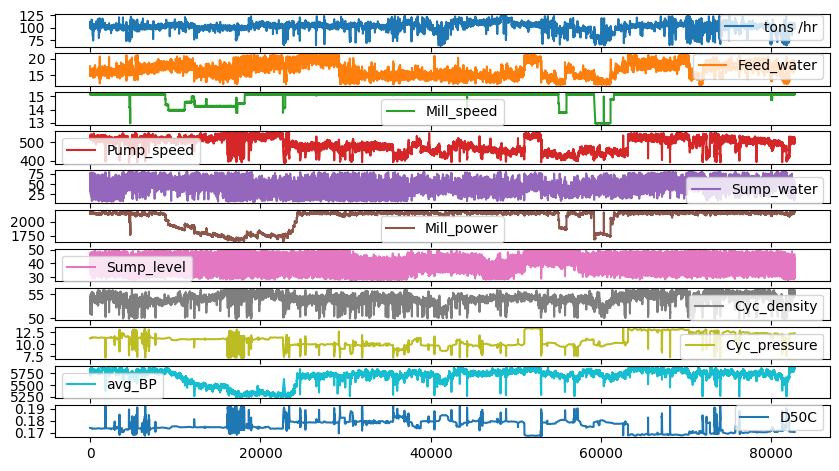

In [12]:
dfs.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

#### stats
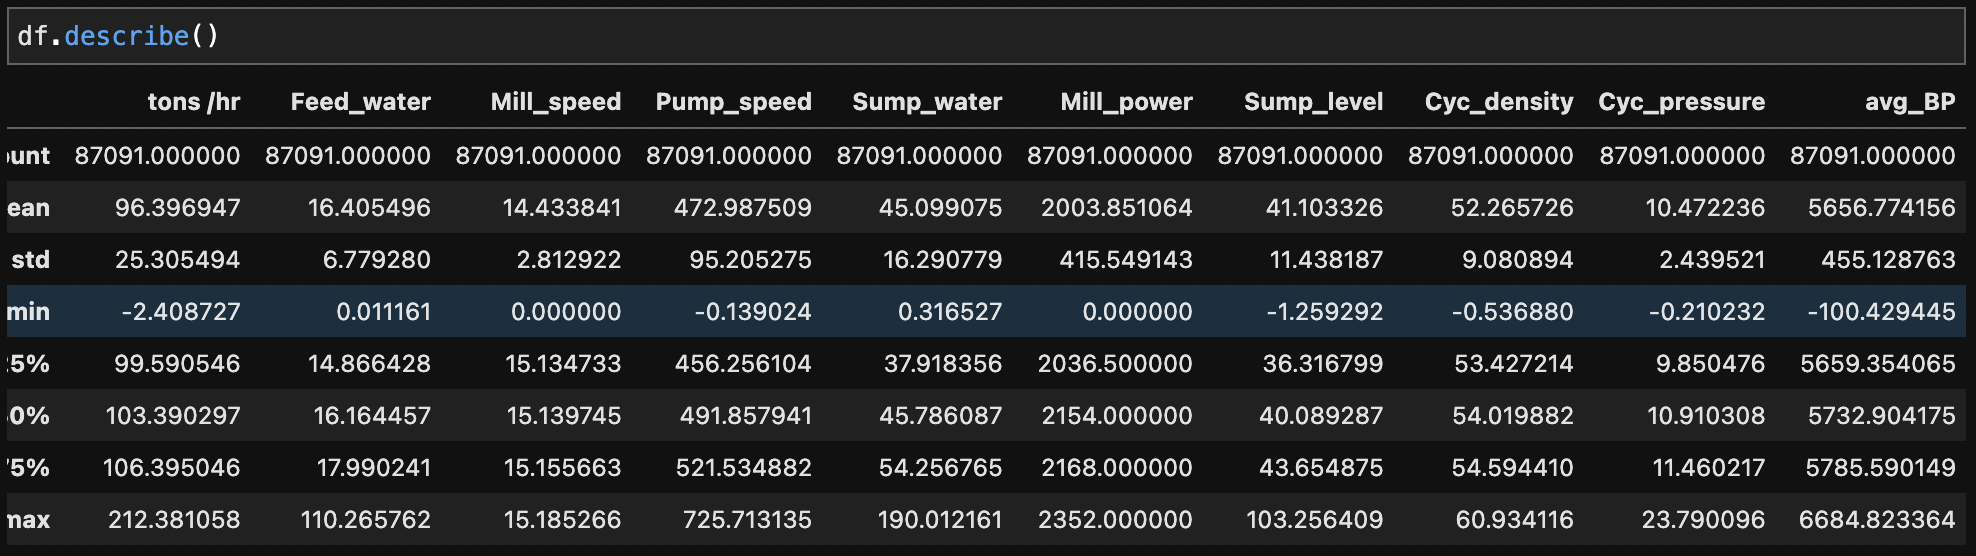

## Upload Data:

In [ ]:
df = pd.read_excel('filled_cleansed_data.xlsx',header=0)

### Dropout spots investigation:
First two at 3500 minutes and 11500 minutes. Here you see two of the first shut off of the process. 5 hours and 1 1/2 hours long:

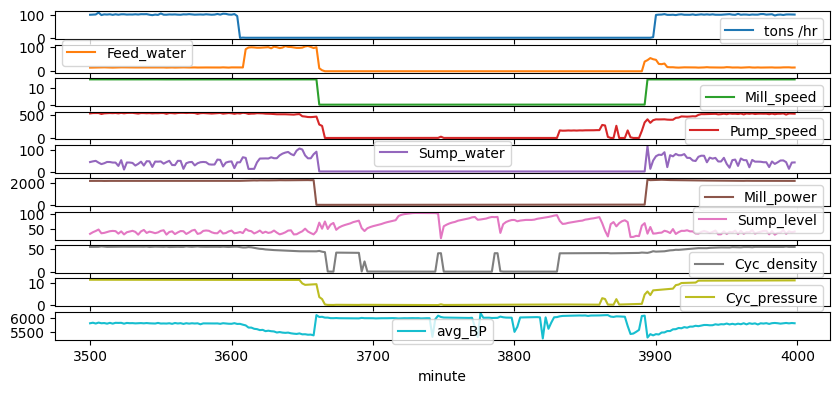

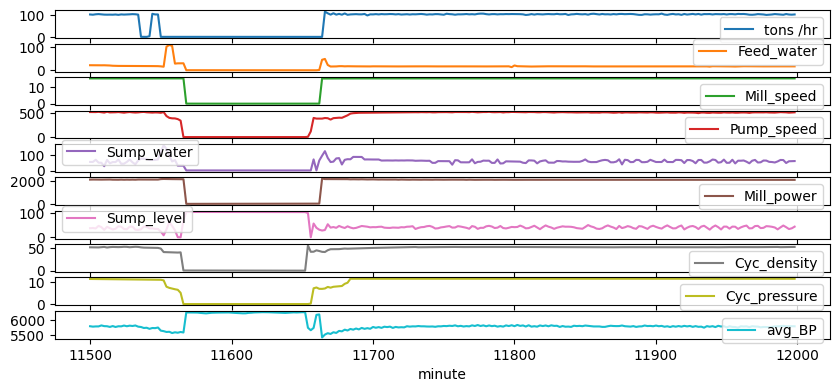

In [91]:
data=df.iloc[1750:2000, :]
data1=df.iloc[5750:6000, :]
data.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()
data1.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()

### kde distributions
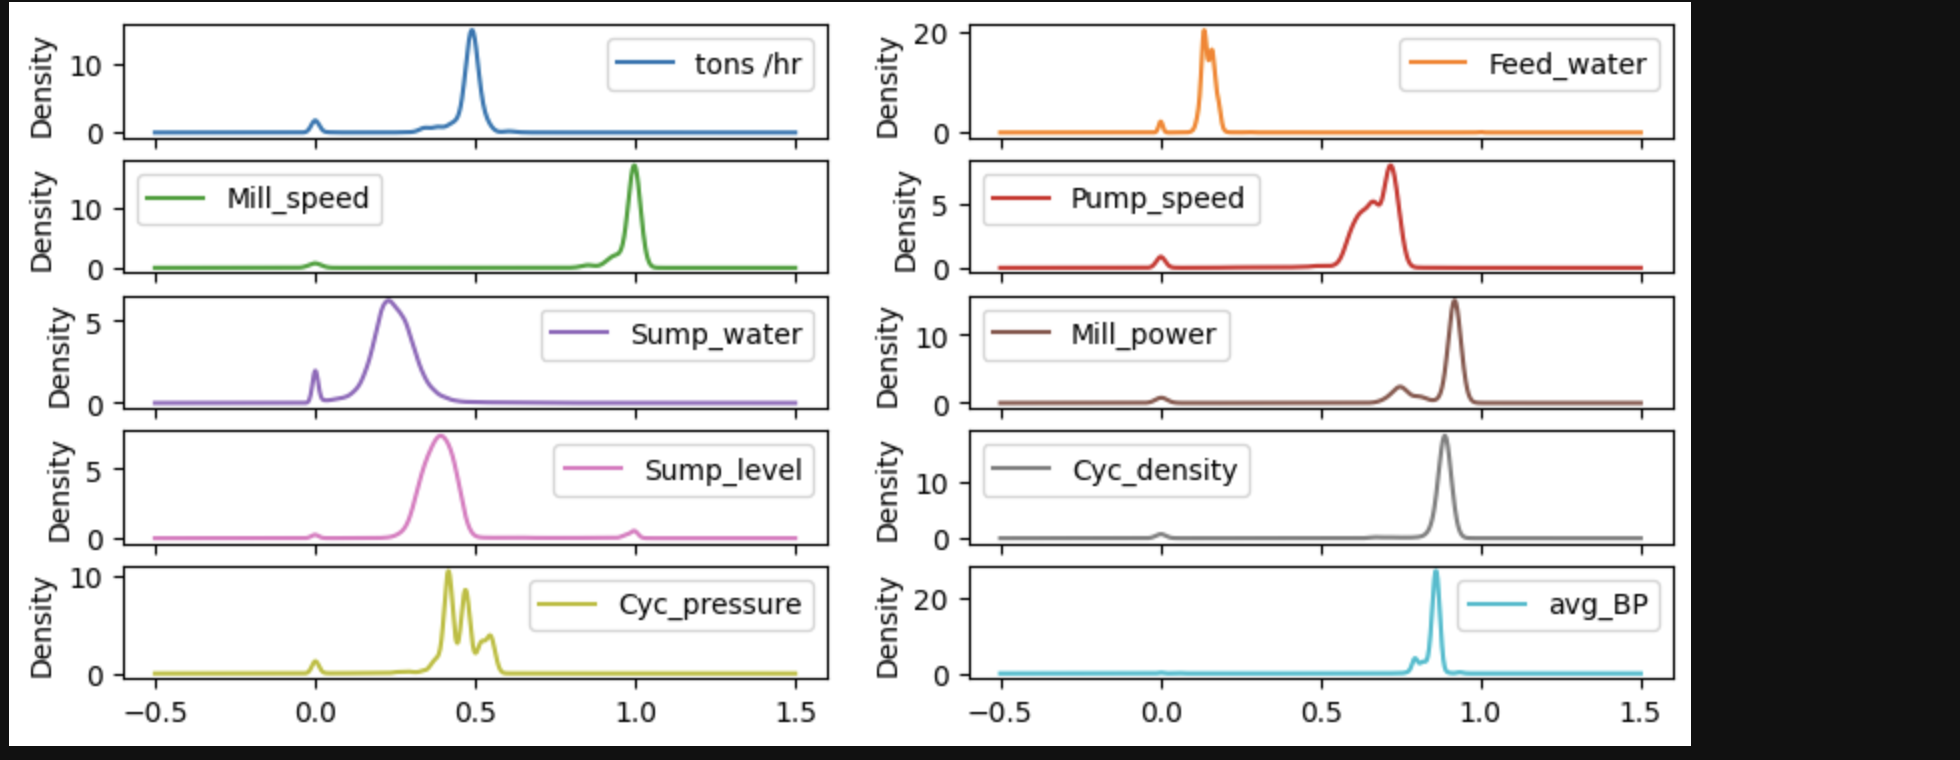

# Filter Outliers/Extrema

1. Rate of Change Filter
2. Alpha Filter (% of previous to next)
2. Cut off below and above by eye
3. Cut off at 99 and 1 percentile, set at that value (Winser)
4. Cut off all "outliers"

### How to fill in

1. Average
2. Don't. Just section
3. Backfill from forward or previous value
4. Splice it together change index (risky)

# Scaling and Plots

1. Min/max scaler
2. Standard scaler
3. Robust Scaler (better? ) uses IQR



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [3]:
df = pd.read_excel('fill_clean_avg_data.xlsx',header=0)
df=df.set_index('minute')

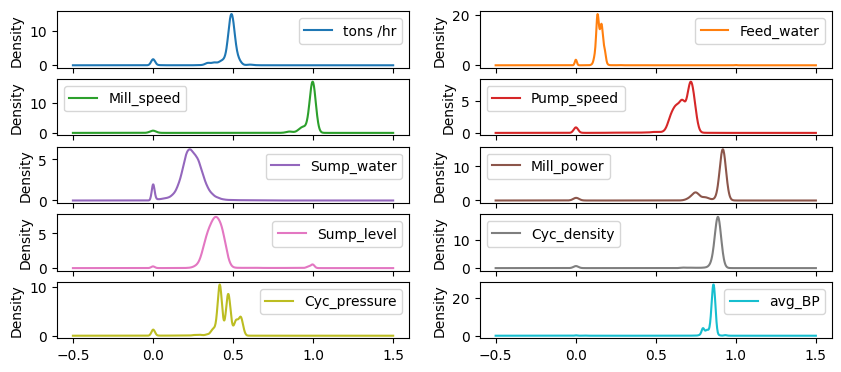

In [115]:
df_mm = (df - df.min())/(df.max() - df.min())
df_mm.plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
plt.show()

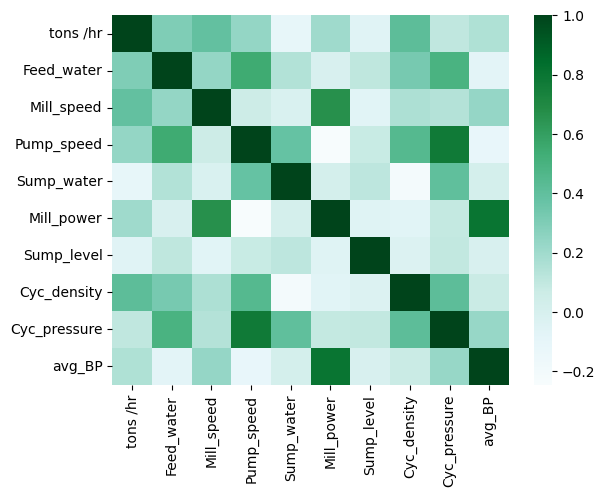

In [27]:
sns.heatmap(df.corr(),cmap='BuGn')
plt.show()

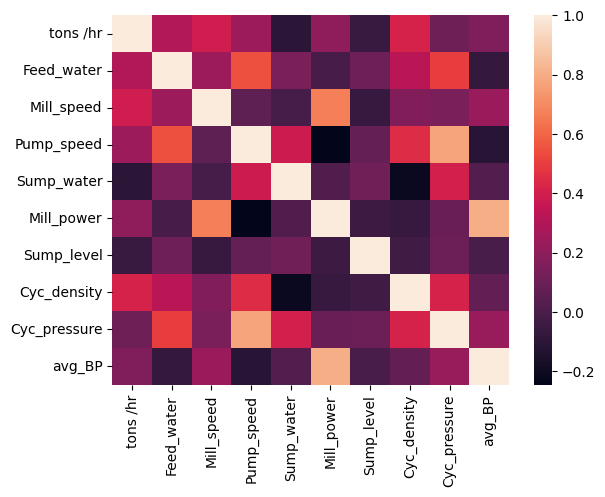

In [25]:
sns.heatmap(df.corr())
plt.show()

#dump in presentation

### Observations:
- Sump_level has negative/ weak correlations
- Feed_water has postive/ weak correlations
-

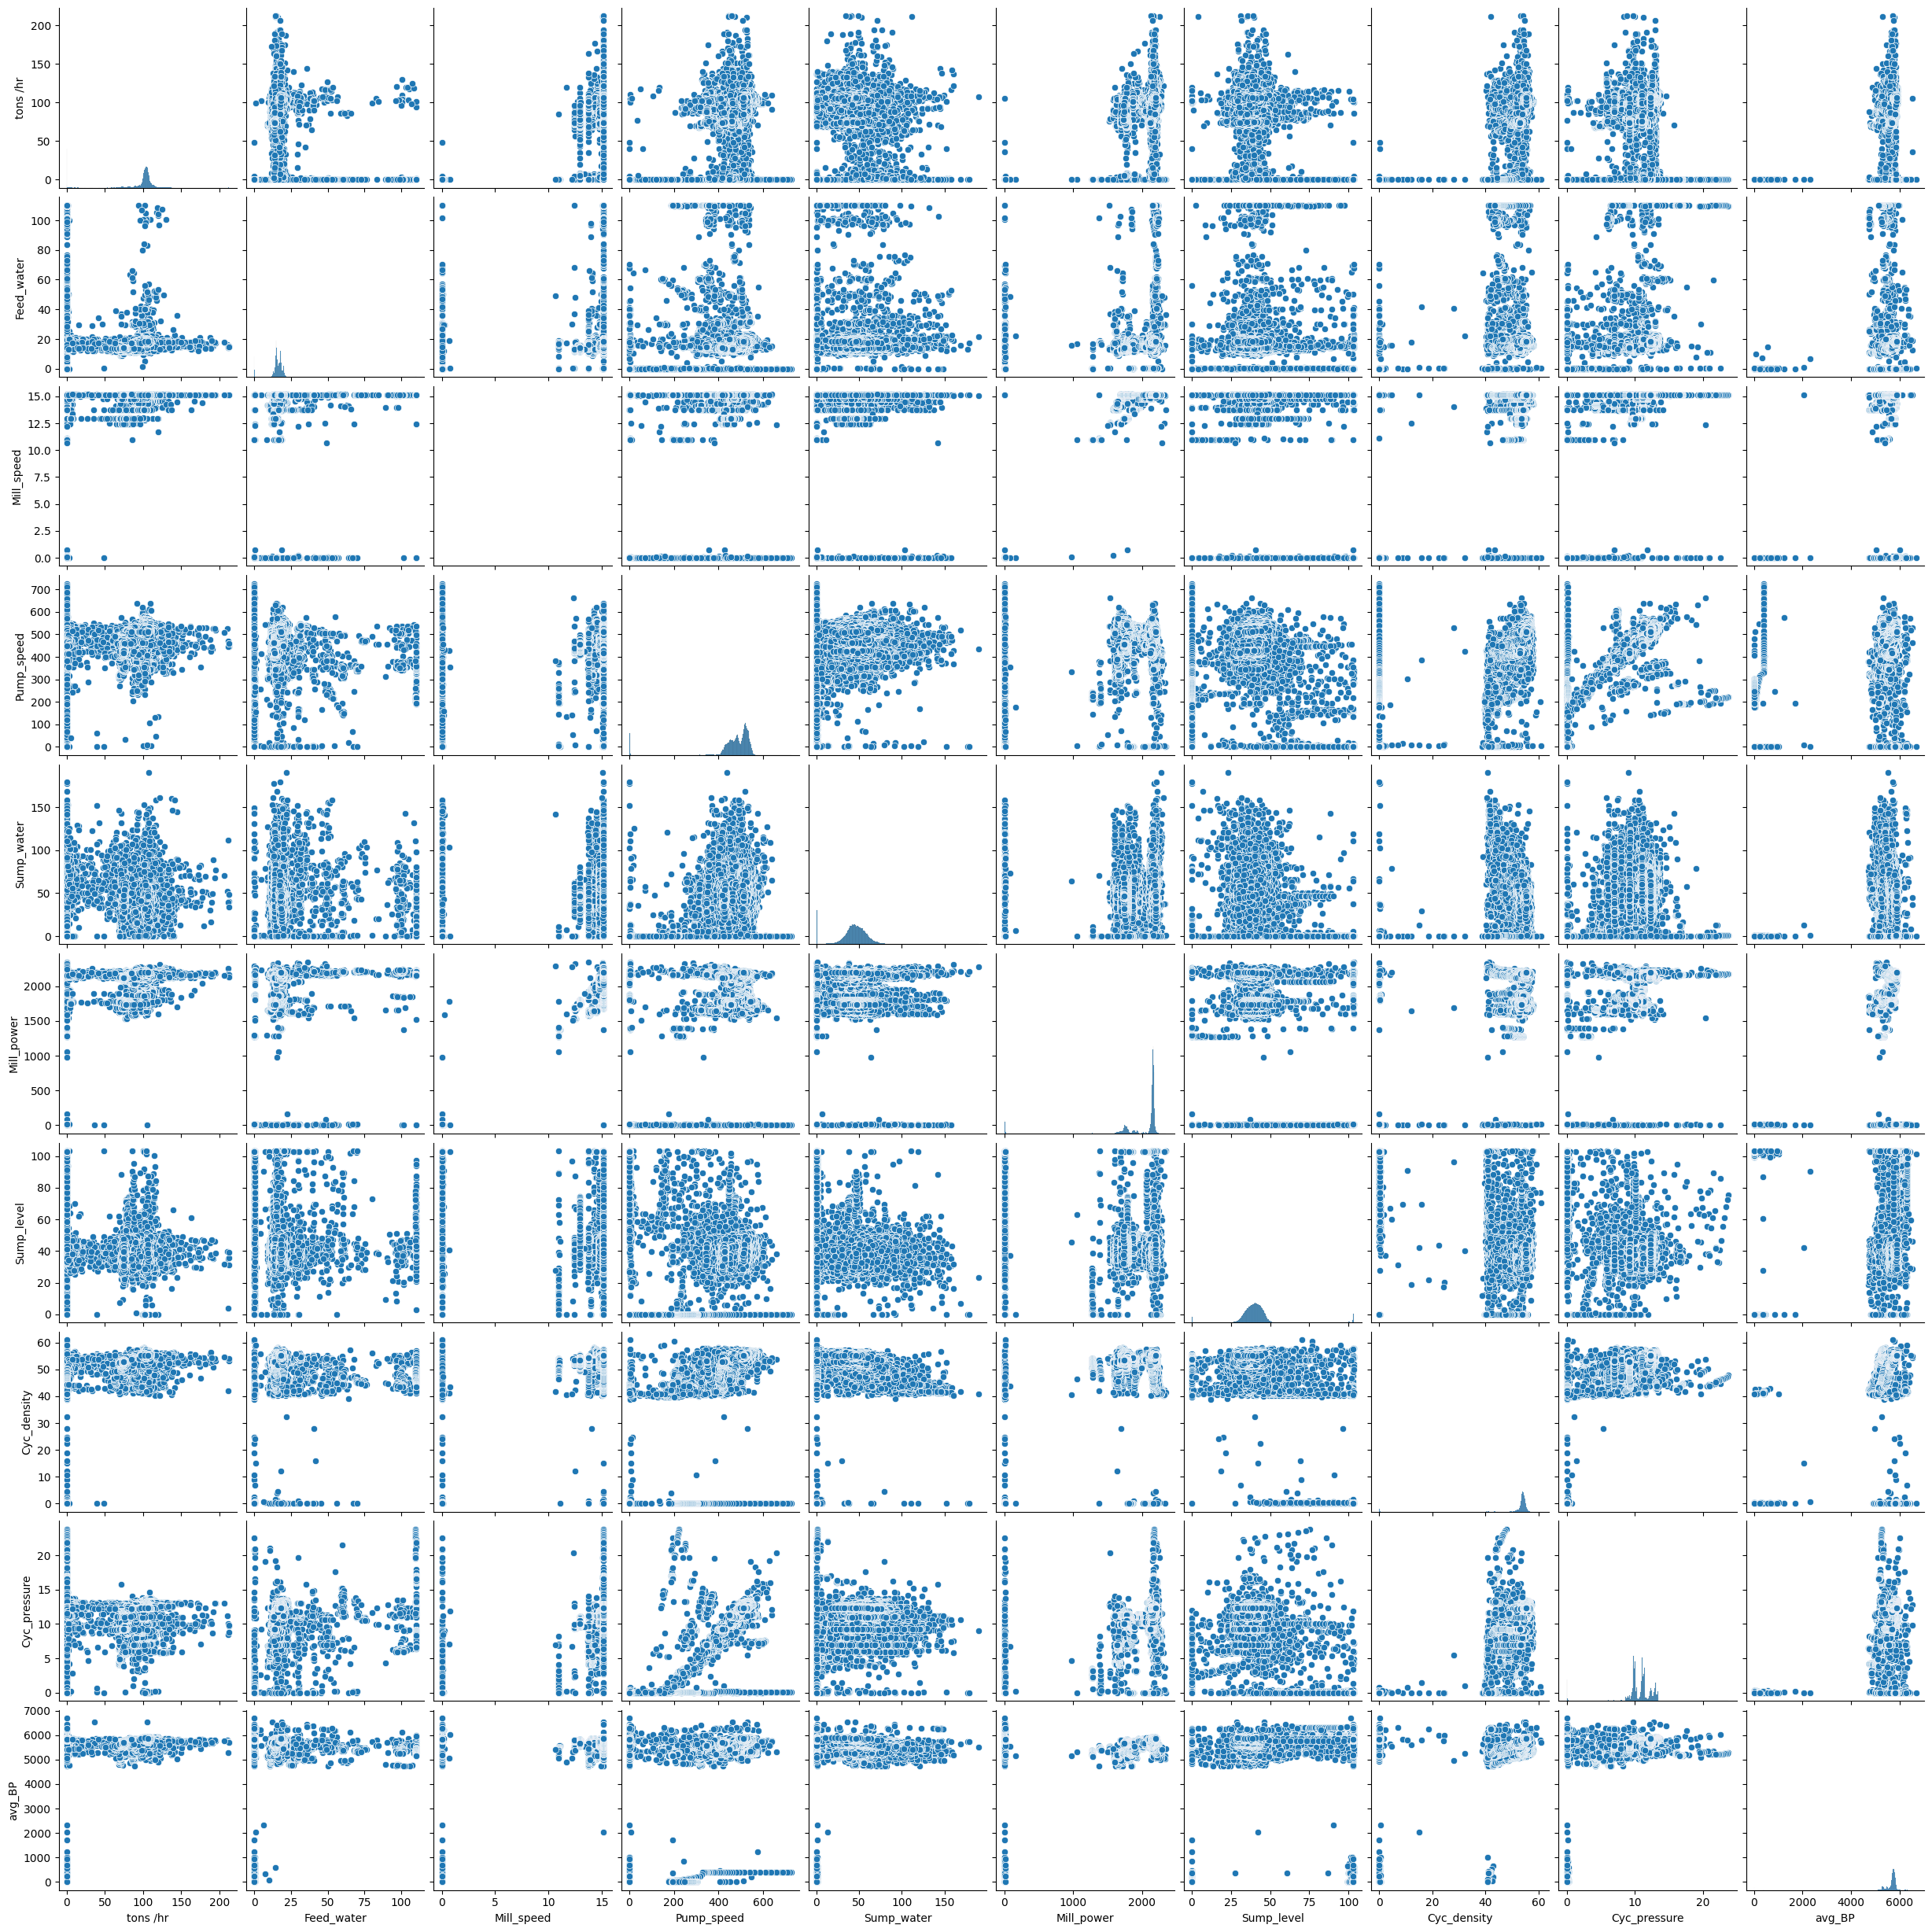

In [121]:
sns.pairplot(df)
plt.show()

In [124]:
####### FILTER FOR BETTER RESULTS ################

####### ALSO, CAN CUT DATA AT HOUR MISSING FOR TRAINING #########
##  12-Mar-23 02:00:00 to 12-Mar-23 03:00:00


#06 Dec 2022 00:00 - 06 April 2023 00:00

#25981-26010 on second spreadsheet
#missed a single hour. row 25987. skip 12-Mar-23 01:58:00 to 12-Mar-23 03:00:00



In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = df.copy()
# Split into train and test subsets (30% for test)

train, test = train_test_split(data, test_size=0.3, shuffle=False)

In [135]:

s = StandardScaler()
dfs=df.copy()
s_train = s.fit_transform(dfs)

In [136]:


print('a: ', s.scale_)
print('Scaler mean')
print('b: ', s.mean_)

a:  [ 25.27160195   6.7792408    2.81290539  95.20439861  16.2906851
 415.54675711  11.40820173   9.07541693   2.43037963 452.71588739]
Scaler mean
b:  [  96.40571331   16.40549575   14.4338414   472.98757522   45.09907487
 2003.85106383   41.11152187   52.26666699   10.47434512 5656.96651817]


In [127]:

#s_test = s.fit_transform(test)

In [137]:


# convert scaled values back to dataframe  
#This is a scaled training and test dataset

s_train_df = pd.DataFrame(s_train, columns=train.columns.values,index=df.index) #train index if partial

#s_test_df = pd.DataFrame(s_test, columns=test.columns.values,index=test.index)


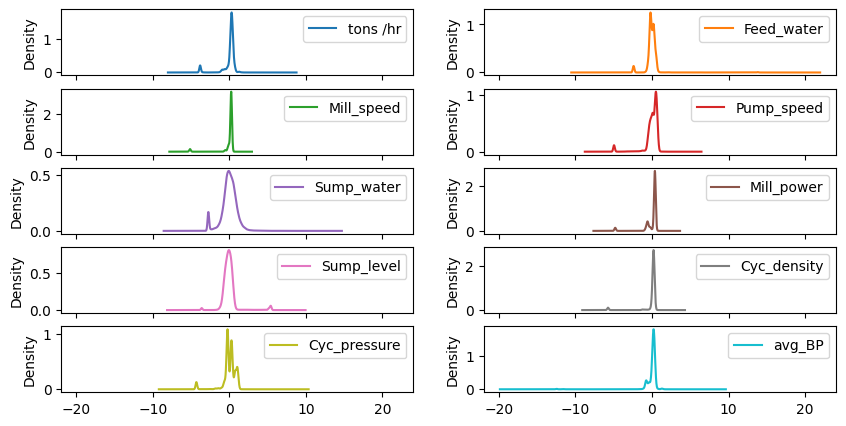

In [180]:

#Standard scaler
s_train_df.plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
plt.show()

In [43]:
#Robust Scaler

In [181]:
from sklearn.preprocessing import RobustScaler

s = RobustScaler()
dfr=df.copy()
r_train = s.fit_transform(dfs)

In [182]:
r_train_df = pd.DataFrame(r_train, columns=train.columns.values,index=df.index) #train index if partial

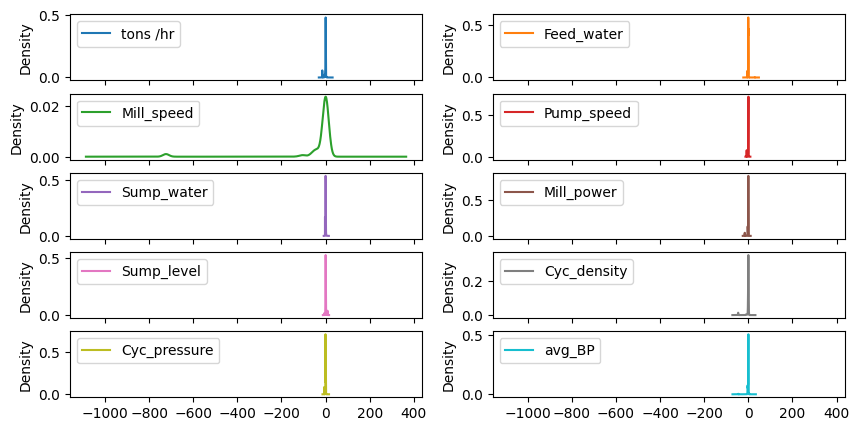

In [183]:
#Robust Scaler
r_train_df.plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
plt.show()

In [ ]:

sns.heatmap(data1.corr())
plt.show()

Note: Interesting that Mill_BP1 shows higher correlation to other variables

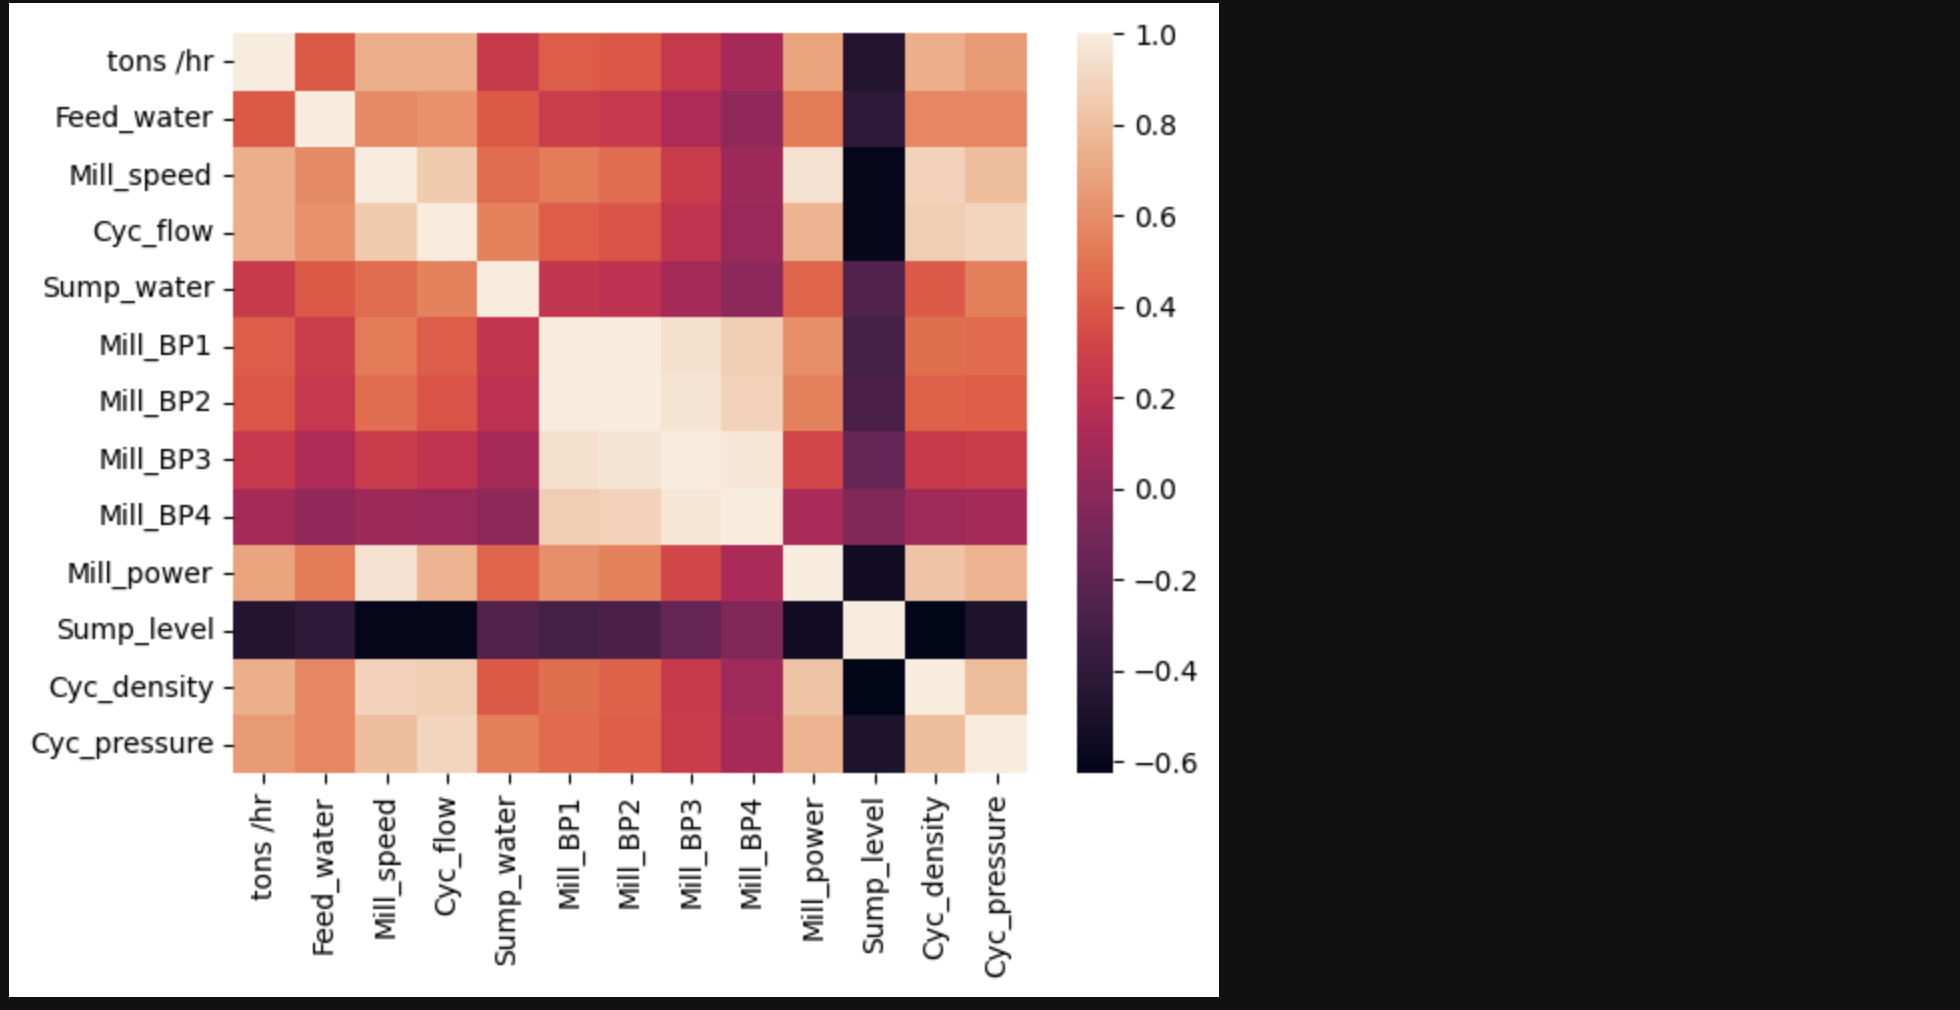

In [181]:
#rename columns if desired
#data.columns= ['TH','FW','MS','CF','SW','P1','P2','P3','P4','MP','SL','CD','CP']
#data.head()

# Counting Outliers


In [4]:
df.describe()

tons /hr    Feed_water    Mill_speed    Pump_speed    Sump_water   
count  87091.000000  87091.000000  87091.000000  87091.000000  87091.000000  \
mean      96.405713     16.405496     14.433841    472.987575     45.099075   
std       25.271747      6.779280      2.812922     95.204945     16.290779   
min        0.000000      0.011161      0.000000      0.000000      0.316527   
25%       99.590546     14.866428     15.134733    456.256104     37.918356   
50%      103.390297     16.164457     15.139745    491.857941     45.786087   
75%      106.395046     17.990241     15.155663    521.534882     54.256765   
max      212.381058    110.265762     15.185266    725.713135    190.012161   

         Mill_power    Sump_level   Cyc_density  Cyc_pressure        avg_BP  
count  87091.000000  87091.000000  87091.000000  87091.000000  87091.000000  
mean    2003.851064     41.111522     52.266667     10.474345   5656.966518  
std      415.549143     11.408267      9.075469      2.430394    452.718487  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%     2036.500000     36.316799     53.427214      9.850476   5659.354065  
50%     2154.000000     40.089287     54.019882     10.910308   5732.904175  
75%     2168.000000     43.654875     54.594410     11.460217   5785.590149  
max     2352.000000    103.256409     60.934116     23.790096   6684.823364

In [178]:



# calculate the interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# count the number of outliers in the column
outliers = (df < lower_bound) | (df > upper_bound)
outliers_count = outliers.sum()

print('Number of outliers:')
print(outliers_count)


Number of outliers:
tons /hr        13405
Feed_water       4016
Mill_speed      16677
Pump_speed       4003
Sump_water       5985
Mill_power      16754
Sump_level       3777
Cyc_density      6827
Cyc_pressure     4518
avg_BP          12218
dtype: int64


In [173]:
pct = df.quantile(0.06)
print(pct)
pct = df.quantile(0.05)
print(pct)
#Feed Rate Gap

tons /hr          65.410774
Feed_water        12.878711
Mill_speed        13.745067
Pump_speed       411.769763
Sump_water        17.610518
Mill_power      1690.000000
Sump_level        31.819599
Cyc_density       50.954885
Cyc_pressure       8.532686
avg_BP          5314.132812
Name: 0.06, dtype: float64
tons /hr           0.351594
Feed_water        12.629596
Mill_speed        12.961800
Pump_speed       380.707962
Sump_water        10.552986
Mill_power      1669.000000
Sump_level        31.347127
Cyc_density       48.867836
Cyc_pressure       7.310539
avg_BP          5302.696045
Name: 0.05, dtype: float64


In [203]:
#Cut bottom 5% of data:
#could interpolate values
count = (df < df.quantile(0.06)).sum()
print(count)

tons /hr        5226
Feed_water      5226
Mill_speed      5159
Pump_speed      5226
Sump_water      5226
Mill_power      5216
Sump_level      5226
Cyc_density     5226
Cyc_pressure    5226
avg_BP          5226
dtype: int64


# Drop them Attempt 1

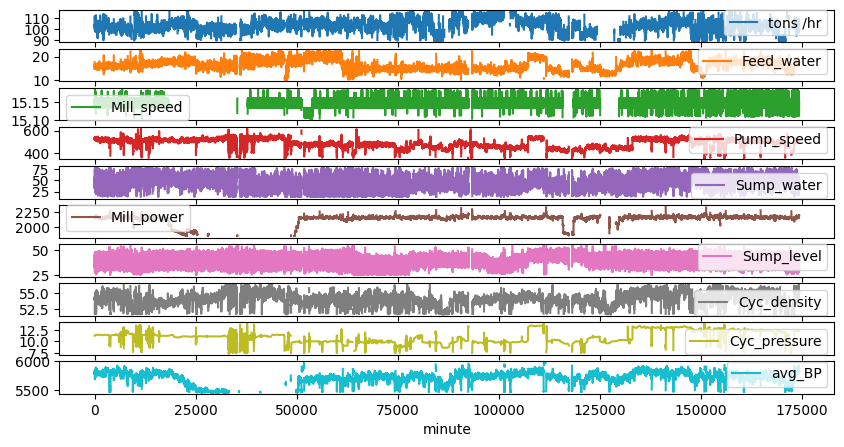

In [188]:
# Try all tonnage outliers then try 6th percentile tonnage
not_outliers = df[(df > lower_bound) & (df < upper_bound)]
not_outliers.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()
#Notice the holes


# add in plot to show dip

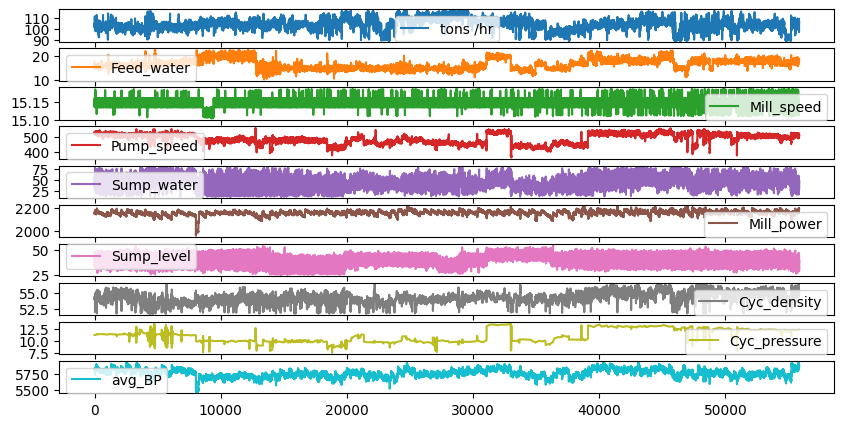

In [200]:
#Cut holes:       #####    NOTICE TIME IS NO LONGER ACCURATE
no_out=not_outliers.reset_index()
no_out.drop('minute',inplace=True,axis=1)
no_out.dropna(inplace=True)
no_out=no_out.reset_index(drop=True)
no_out.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

#Option:  could interpolate for 10 minutes where there is dropped data

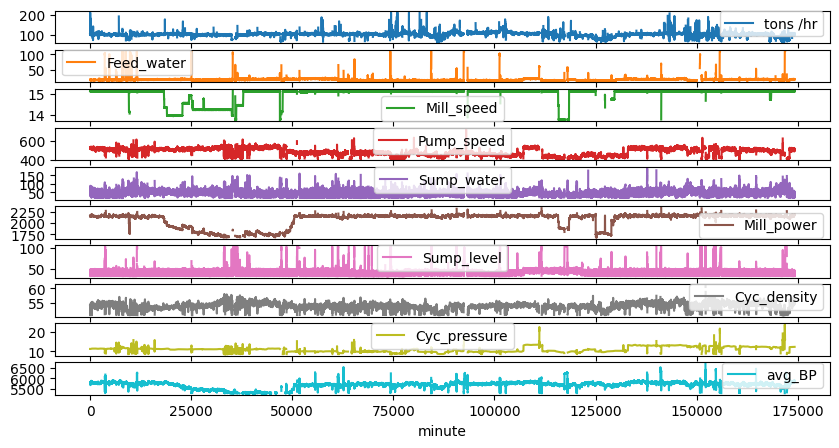

In [201]:
# with 6 percentile:
avoid_off = df[(df['tons /hr'] > df['tons /hr'].quantile(0.06)) ] #& (df < upper_bound)]
avoid_off.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

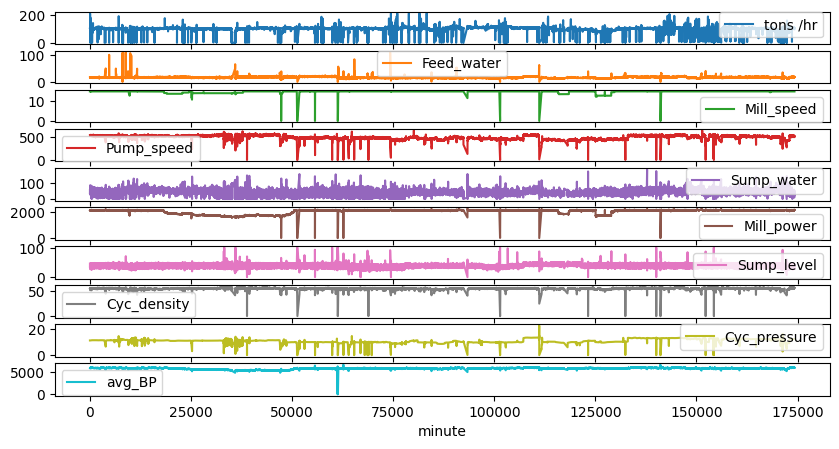

In [205]:
#with 5th percentile of feed tph
avoid_off = df[(df['tons /hr'] > df['tons /hr'].quantile(0.05)) ] #& (df < upper_bound)]
avoid_off.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

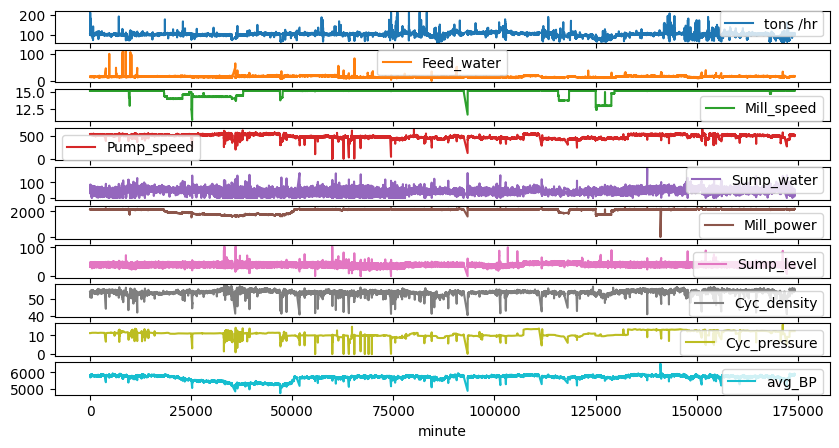

In [204]:
#with 6th percentile of feed tph
avoid_off = df[(df['tons /hr'] > df['tons /hr'].quantile(0.06)) ] #& (df < upper_bound)]
avoid_off.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

In [1]:
#with 6th percentile of feed tph and 1st percentile of everything:
da=df.copy()
da = df[(df['tons /hr'] > df['tons /hr'].quantile(0.05)) ] #& (df < upper_bound)]

# da=df.copy()
# # find 5th percentile value for column B
# threshold = da['tons /hr'].quantile(0.05)

# # replace values below threshold with NaN
# da.loc[df['tons /hr'] < threshold, 'tons /hr'] = np.nan
# print(len(da))

#da = da.interpolate(method='slinear', limit_direction='both', axis=0)

avoid_off = da[(da > da.quantile(0.01)) & (da < da.quantile(0.99)) ]
avoid_off.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

NameError: name 'df' is not defined

In [228]:
len(df)
len(avoid_off)

87091

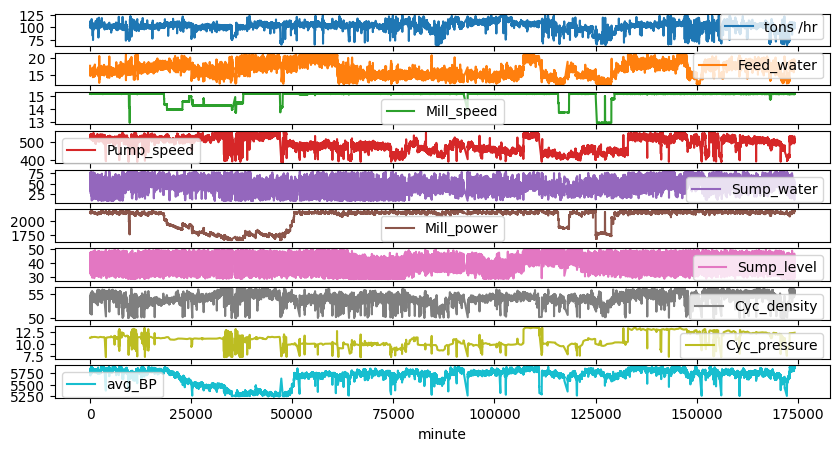

In [215]:
# There is 7+ % of the data missing at this point. this is bad data... but not horrible. 
#smooth_df=avoid_off.interpolate(method='slinear')
smooth_df = avoid_off.interpolate(method='slinear', limit_direction='both', axis=0)
smooth_df.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

In [219]:
smooth_df.to_excel('smoothed_data.xlsx',index=False,header=True)
#samp.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
#plt.show()

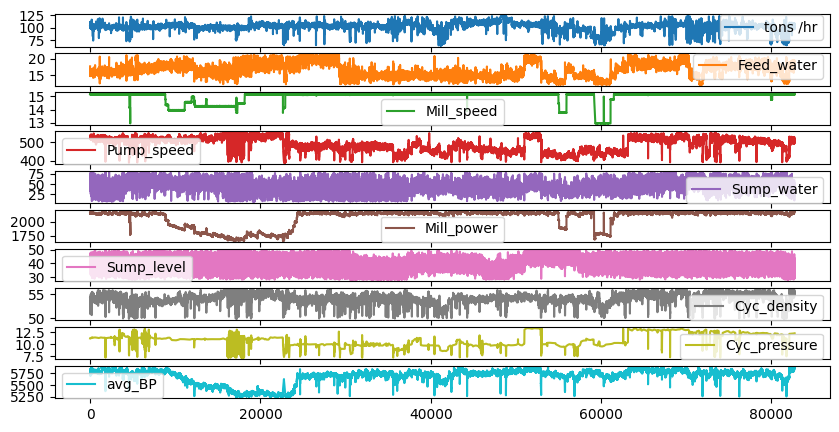

In [4]:
s_df=pd.read_excel('smoothed_data.xlsx',header=0)
s_df.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

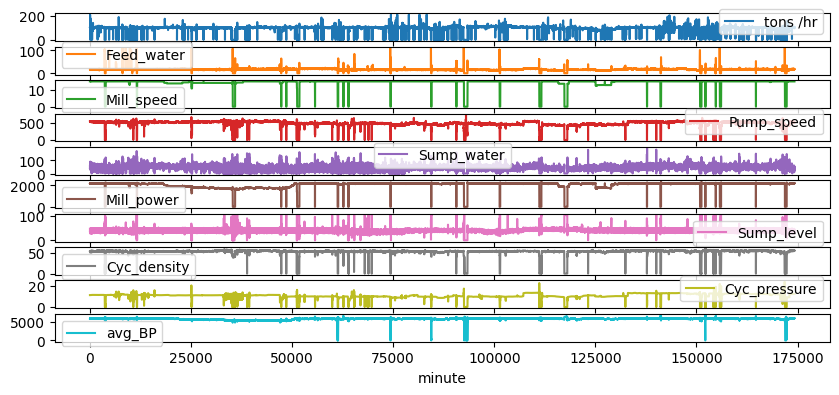

In [184]:
data=df.copy()
data.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()

# K-means at last

In [12]:
# Try min-max and standard scaler
# df is normal data
# df_mm is min max
# s_train_df is standard scaler
# Could do both?
# s_df is smoothed: 6% tph dropped and 1% & 99% of others

#Scale!   put data frame here so dont change names in program:
df=s_df.copy()
df = (df - df.min())/(df.max() - df.min())

In [13]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,n_init=10)
    kmeanModel.fit(df.T)      #put data frame here
    distortions.append(kmeanModel.inertia_)


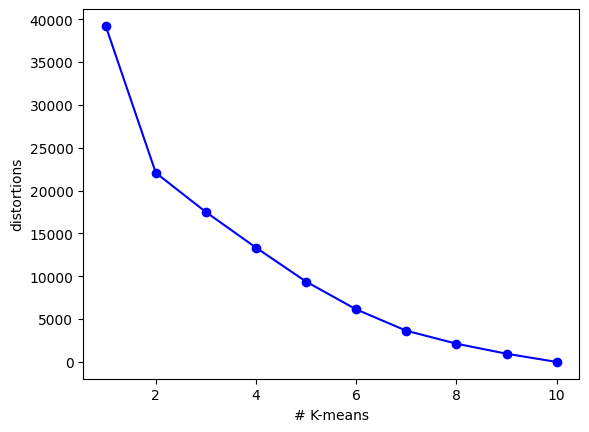

In [29]:
plt.plot(K, distortions, '-bo')

plt.ylabel('distortions')
plt.xlabel('# K-means')
plt.show()

In [15]:
kmeanModel = KMeans(n_clusters=3,n_init=10)
kmeanModel.fit(df.T)

KMeans(n_clusters=3, n_init=10)

In [16]:
kmeanModel = KMeans(n_clusters=3,n_init=10)
kmeanModel.fit(df.T)


kmeans_results = kmeanModel.predict(df.T)

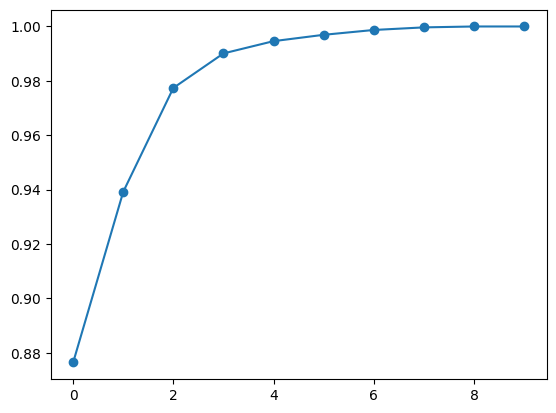

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA, PCA

#Need more understanding here

data = df.head(500)
df_segmention = data.transpose()
# segmentation_std = df_segmention
# Preprocessing
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmention)
# print(segmentation_std)

# Kernel PCA
# Init ( n_components = 5 )
pca = PCA()
pca.fit(segmentation_std)
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.show()
pca = KernelPCA(n_components=5, random_state=0, kernel='linear')
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)


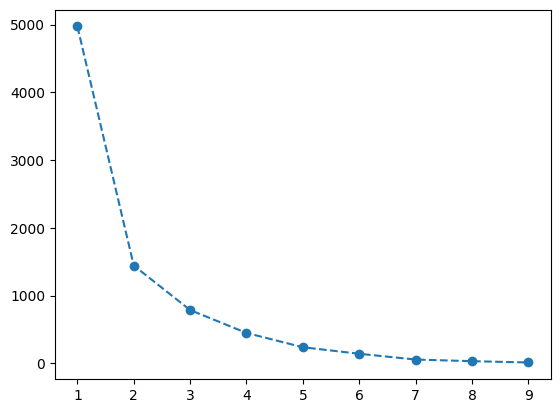

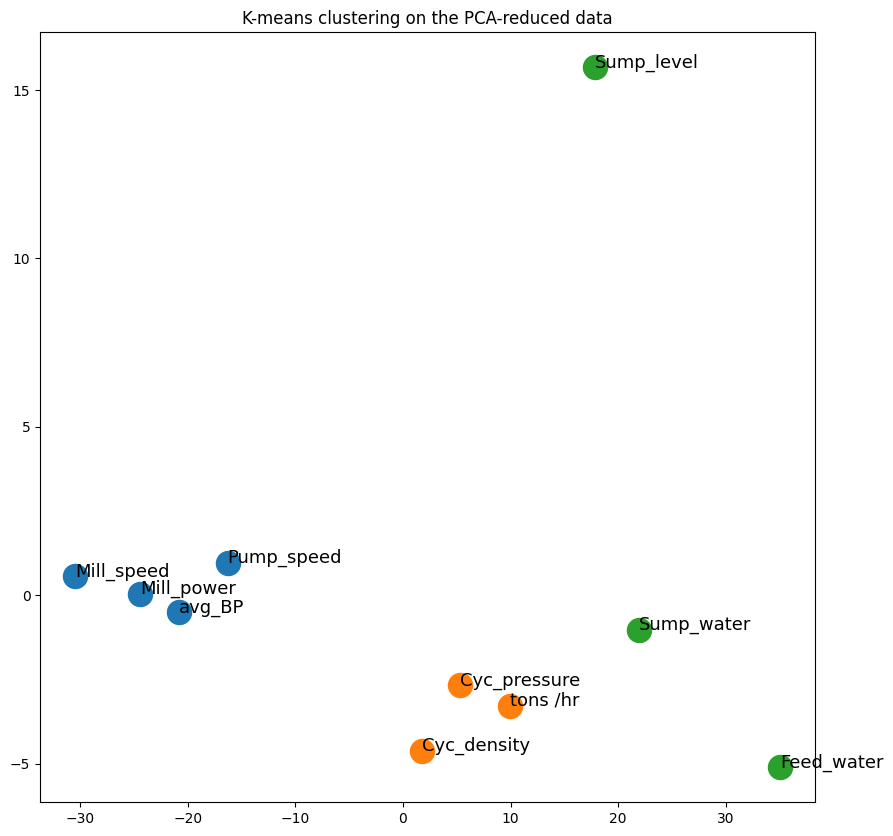

In [19]:

# KMeans
# Init ( n_components = 4 )
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, random_state=0,n_init=10).fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.show()
nc = 3
kmeans_pca = KMeans(n_clusters=nc, random_state=0,n_init=10)
kmeans_pca.fit(scores_pca)

# Results
df_segm_pca_kmeans = pd.DataFrame(scores_pca, index=df_segmention.index)

# df_segm_pca_kmeans.columns.values[-3:]
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_n = {}
plt.figure(figsize=(10,10))
for k in range(nc):
    df_n[k+1] = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means PCA'] == k]
    plt.scatter(df_n[k+1][0], df_n[k+1][1], s=300)
for k, col in enumerate(df_segm_pca_kmeans.index):
    plt.annotate(col, (df_segm_pca_kmeans.loc[col][0], df_segm_pca_kmeans.loc[col][1]), size=13)
plt.title('K-means clustering on the PCA-reduced data')
plt.show()

In [20]:
#With 4

kmeanModel = KMeans(n_clusters=4,n_init=10)
kmeanModel.fit(df.T)


kmeans_results = kmeanModel.predict(df.T)

df.T['kmeans'] = kmeans_results

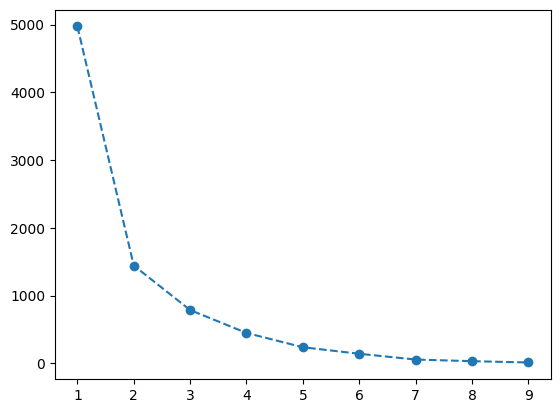

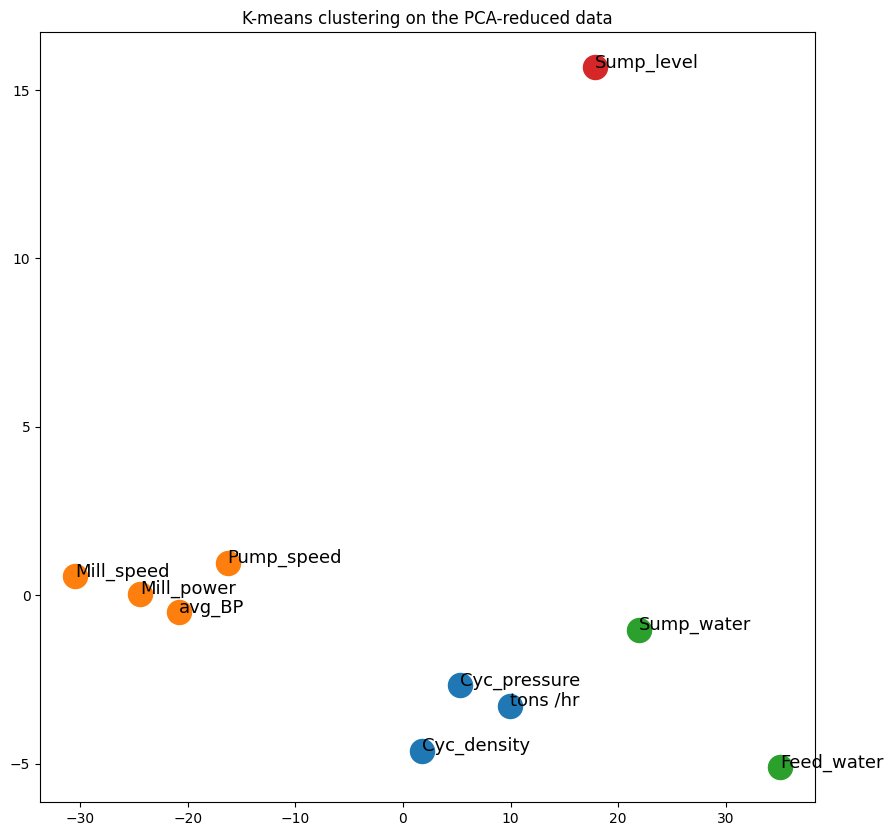

In [22]:

# KMeans
# Init ( n_components = 4 )
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, random_state=0,n_init=10).fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.show()
nc = 4
kmeans_pca = KMeans(n_clusters=nc, random_state=0,n_init=10)
kmeans_pca.fit(scores_pca)

# Results
df_segm_pca_kmeans = pd.DataFrame(scores_pca, index=df_segmention.index)

# df_segm_pca_kmeans.columns.values[-3:]
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_n = {}
plt.figure(figsize=(10,10))
for k in range(nc):
    df_n[k+1] = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means PCA'] == k]
    plt.scatter(df_n[k+1][0], df_n[k+1][1], s=300)
for k, col in enumerate(df_segm_pca_kmeans.index):
    plt.annotate(col, (df_segm_pca_kmeans.loc[col][0], df_segm_pca_kmeans.loc[col][1]), size=13)
plt.title('K-means clustering on the PCA-reduced data')
plt.show()

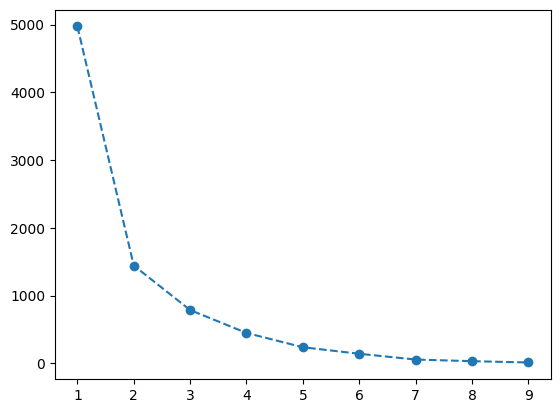

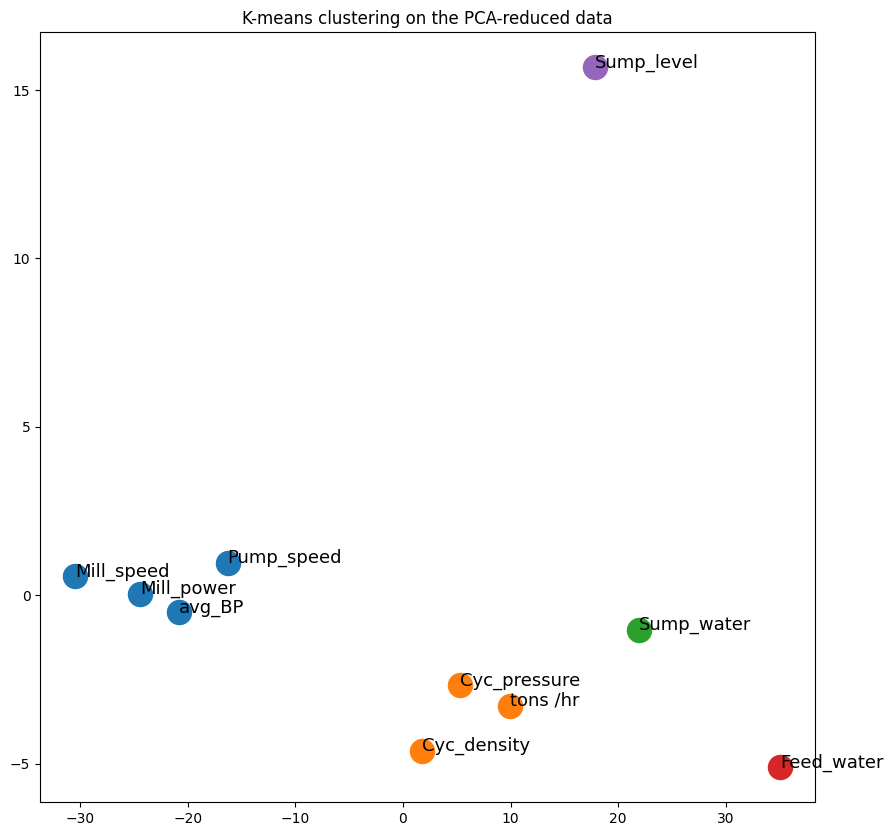

In [23]:

#With 5

kmeanModel = KMeans(n_clusters=5,n_init=10)
kmeanModel.fit(df.T)


kmeans_results = kmeanModel.predict(df.T)

df.T['kmeans'] = kmeans_results

# KMeans
# Init ( n_components = 5 )
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, random_state=0,n_init=10).fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.show()
nc = 5
kmeans_pca = KMeans(n_clusters=nc, random_state=0,n_init=10)
kmeans_pca.fit(scores_pca)

# Results
df_segm_pca_kmeans = pd.DataFrame(scores_pca, index=df_segmention.index)

# df_segm_pca_kmeans.columns.values[-3:]
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_n = {}
plt.figure(figsize=(10,10))
for k in range(nc):
    df_n[k+1] = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means PCA'] == k]
    plt.scatter(df_n[k+1][0], df_n[k+1][1], s=300)
for k, col in enumerate(df_segm_pca_kmeans.index):
    plt.annotate(col, (df_segm_pca_kmeans.loc[col][0], df_segm_pca_kmeans.loc[col][1]), size=13)
plt.title('K-means clustering on the PCA-reduced data')
plt.show()

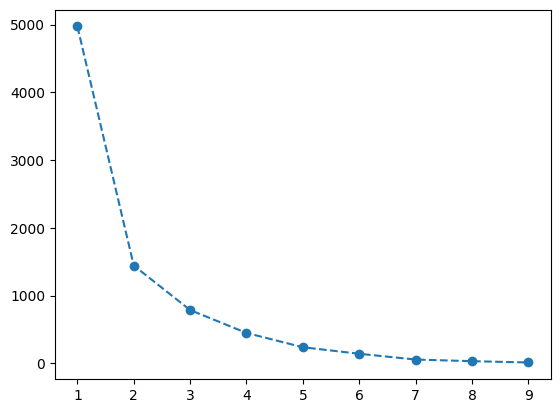

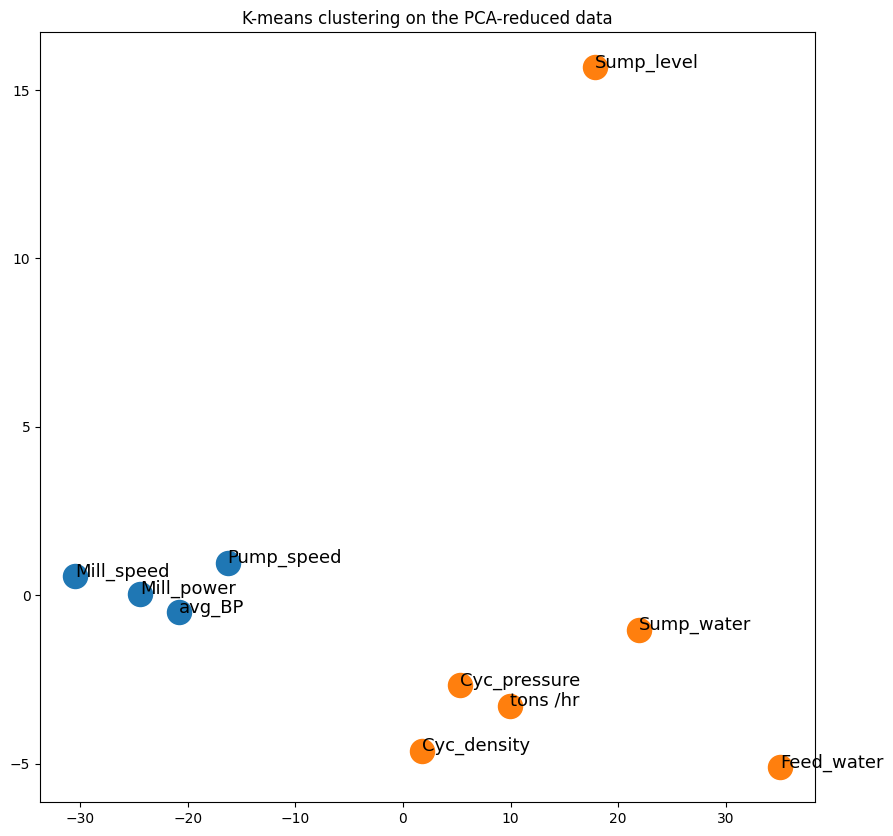

In [24]:

#With 2

kmeanModel = KMeans(n_clusters=2,n_init=10)
kmeanModel.fit(df.T)


kmeans_results = kmeanModel.predict(df.T)

df.T['kmeans'] = kmeans_results

# KMeans
# Init ( n_components = 2 )
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, random_state=0,n_init=10).fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.show()
nc = 2
kmeans_pca = KMeans(n_clusters=nc, random_state=0,n_init=10)
kmeans_pca.fit(scores_pca)

# Results
df_segm_pca_kmeans = pd.DataFrame(scores_pca, index=df_segmention.index)

# df_segm_pca_kmeans.columns.values[-3:]
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_n = {}
plt.figure(figsize=(10,10))
for k in range(nc):
    df_n[k+1] = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means PCA'] == k]
    plt.scatter(df_n[k+1][0], df_n[k+1][1], s=300)
for k, col in enumerate(df_segm_pca_kmeans.index):
    plt.annotate(col, (df_segm_pca_kmeans.loc[col][0], df_segm_pca_kmeans.loc[col][1]), size=13)
plt.title('K-means clustering on the PCA-reduced data')
plt.show()